# Emergency (911) Calls Capstone project

Emergency (911) Calls: Fire, Traffic, EMS for Montgomery County, PA

The data contains the following fields:
    
lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1) 

In [1]:
import numpy as np #  is a Python library used for working with arrays
import pandas as pd # Pandas is used to analyze data

Importing visualization libraries and set %matplotlib inline

In [2]:
import matplotlib.pyplot as plt # library of data visualization with Python
import seaborn as sns # a Python data visualization library based on matplotlib
%matplotlib inline

Loading data

In [3]:
em_call = pd.read_csv('911_call.csv')

In [4]:
em_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
em_call.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
em_call['zip'].value_counts() 
# looking for zip codes

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
           ... 
19119.0       1
77316.0       1
19457.0       1
19107.0       1
19127.0       1
Name: zip, Length: 104, dtype: int64

In [7]:
em_call['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [10]:
em_call['twp'].value_counts().head(5)
# top 5 twp

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [11]:
em_call['title'].nunique() 
# total distinct titles are 110

110

In the titles column there are "Causes/Departments" specified before the title code. 
These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression to creating a new column called "Cause"

In [19]:
em_call['cause'] = em_call['title'].apply(lambda x: x.split(':')[0]) 
# seperate EMS, Traffic, Fire

In [20]:
em_call['cause'].value_counts()
# most common cause for 911 call

EMS        48877
Traffic    35695
Fire       14920
Name: cause, dtype: int64

<AxesSubplot:xlabel='cause', ylabel='count'>

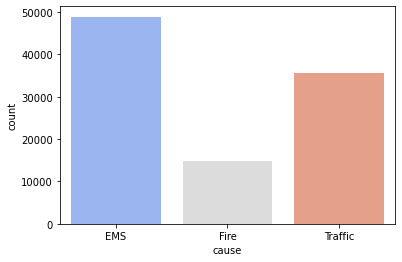

In [22]:
sns.countplot(x = 'cause', data = em_call, palette='coolwarm') 
# using seaborn creating a countplot of 911 calls by cause

In [24]:
# Using pd.to_datetime to convert the column from strings to DateTime objects.

em_call['timeStamp'] = pd.to_datetime(em_call['timeStamp'])

In [27]:
# using .apply() to creating 3 new columns called Hour, Month, and Day of Week

em_call['Hour'] = em_call['timeStamp'].apply(lambda time : time.hour)
em_call['month'] = em_call['timeStamp'].apply(lambda time : time.month)
em_call['Day of Week'] = em_call['timeStamp'].apply(lambda time: time.dayofweek)

em_call.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,cause,Hour,month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [28]:
# using map() coverting Day of Week in to the actual string names.
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

em_call['Day of Week'] = em_call['Day of Week'].map(dmap)
em_call.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,cause,Hour,month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


<AxesSubplot:xlabel='Day of Week', ylabel='count'>

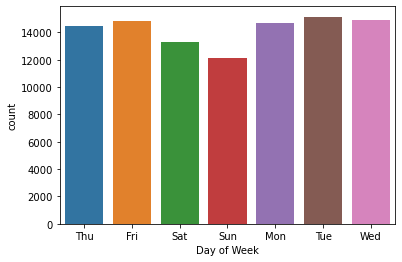

In [29]:
# creating a countplot of the Day of Week using seabourn.
# column with the hue based off of the cause column.
sns.countplot(x = 'Day of Week', data = em_call)

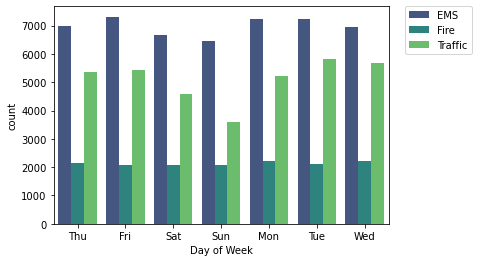

In [38]:
# creating a countplot for day of week with hue = cause
sns.countplot(x = 'Day of Week', data = em_call,hue = 'cause', palette='viridis')

# making legend outside of graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='month', ylabel='count'>

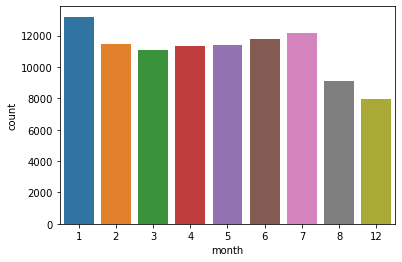

In [39]:
# creating a countplot of the month using seabourn.
# column with the hue based off of the cause column.
sns.countplot(x = 'month', data = em_call)

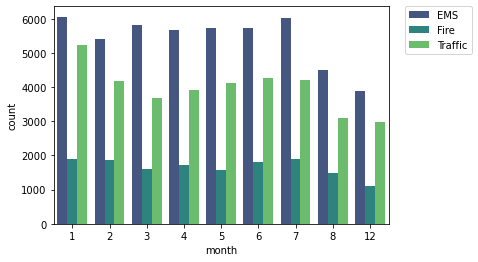

In [37]:
# creating a countplot for months with hue = cause
sns.countplot(x = 'month', data = em_call, hue = 'cause', palette='viridis')

# making legend outside of graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

In [40]:
#creating a gropuby object called byMonth, 
# where you group the DataFrame by the month column and using the count() method for aggregation
bymonth = em_call.groupby('month').count()

In [41]:
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,cause,Hour,Day of Week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


<AxesSubplot:xlabel='month'>

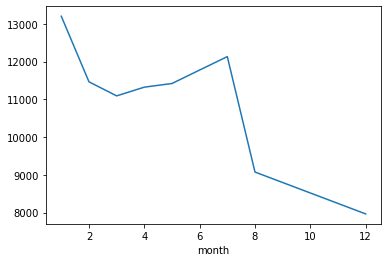

In [42]:
# creating a simple plot off of the dataframe indicating the count of calls per month
bymonth['twp'].plot()

In [43]:
# reseting the index into a new column
bymonth.reset_index()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,cause,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


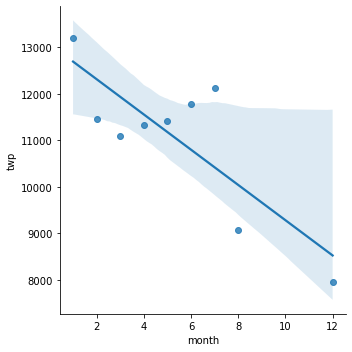

In [45]:
# using seaborn's lmplot() to create a linear fit on the number of calls per month
sns.lmplot(x = 'month',y = 'twp', data = bymonth.reset_index())

In [47]:
# Create a new column called 'Date' that contains the date from the timeStamp column

t = em_call['timeStamp'].iloc[0]
em_call['Date'] = em_call['timeStamp'].apply(lambda t:t.date())
em_call.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,cause,Hour,month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [48]:
# grouping the Date column with the count() aggregate and creating a plot of counts of 911 calls
em_call.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,cause,Hour,month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


creating 3 separate plots with each plot representing a Reason for the 911 call

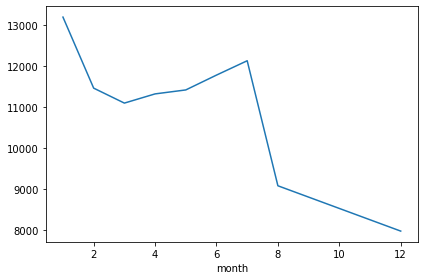

In [71]:
em_call.groupby('month').count()['Hour'].plot()

plt.tight_layout()

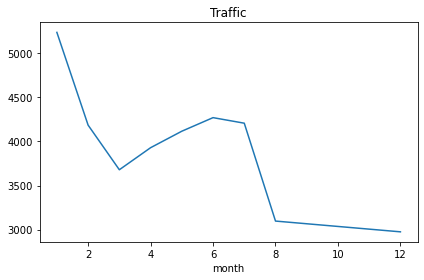

In [69]:
# for traffic
em_call[em_call['cause']=='Traffic'].groupby('month').count()['Hour'].plot()
plt.title('Traffic')
plt.tight_layout()

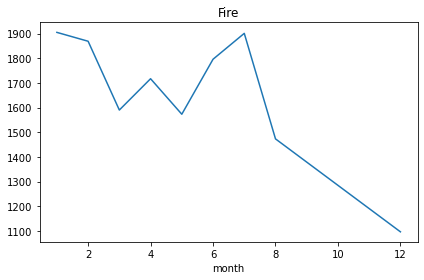

In [70]:
# for fire
em_call[em_call['cause']=='Fire'].groupby('month').count()['Hour'].plot()
plt.title('Fire')
plt.tight_layout()

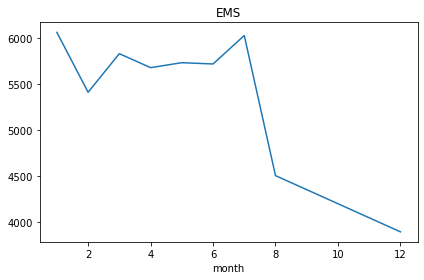

In [72]:
# for EMS
em_call[em_call['cause']=='EMS'].groupby('month').count()['Hour'].plot()
plt.title('EMS')
plt.tight_layout()

In [75]:
# restructure the dataframe so that the columns become the Hours 
# and the Index becomes the Day of the Week using unstack()

# Returns a DataFrame having a new level of column labels whose 
# inner-most level consists of the pivoted index labels

dayHour = em_call.groupby(by=['Day of Week','Hour']).count()['cause'].unstack()

dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

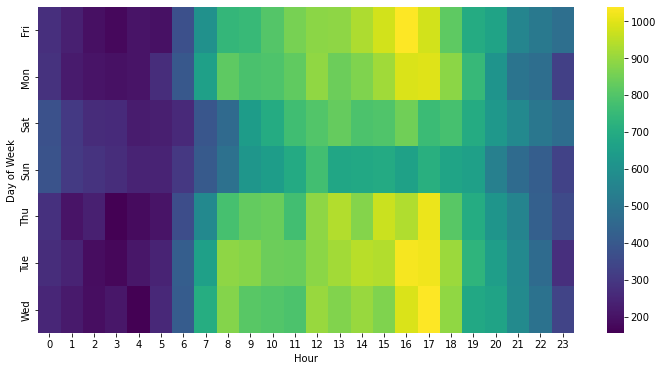

In [76]:
# creating a HeatMap 
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

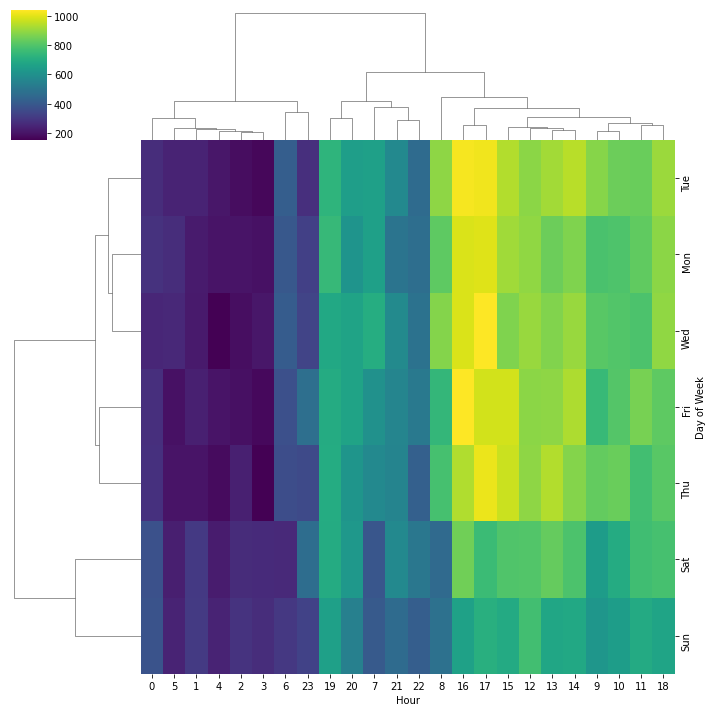

In [77]:
# creating a clustermap 
sns.clustermap(dayHour,cmap='viridis')

In [80]:
# restructing for month

dayMonth = em_call.groupby(by=['Day of Week','month']).count()['cause'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='month', ylabel='Day of Week'>

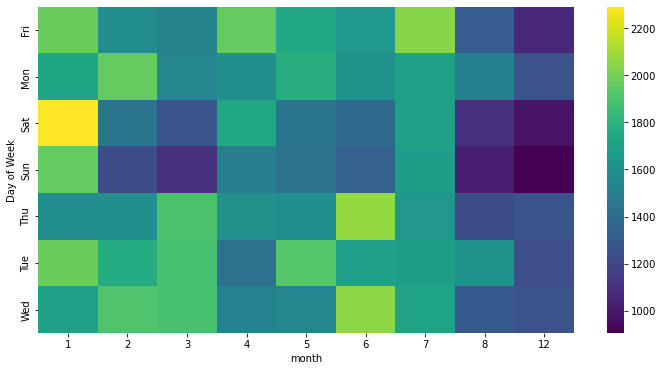

In [81]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

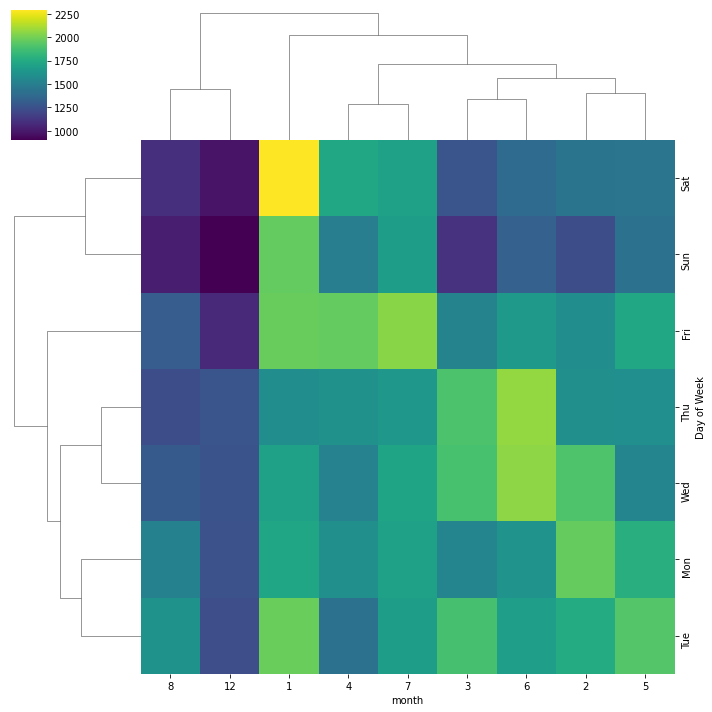

In [82]:
sns.clustermap(dayMonth,cmap='viridis')